In [1]:
from itertools import combinations

import networkx as nx
from sklearn.metrics import f1_score
import numpy as np
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score,BicScore
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling
from pgmpy.models.BayesianModel import BayesianModel
import matplotlib.pyplot as plt

In [2]:
model = get_example_model('alarm')
samples = BayesianModelSampling(model).forward_sample(size=int(1e3))
samples.head()

Generating for node: VENTMACH:   0%|                                                                                                                                                                                                             | 0/37 [00:00<?, ?it/s]D:\Study\RL\random-network-distillation-pytorch-master\PGM\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: CVP: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 334.31it/s]


,MINVOLSET,VENTMACH,DISCONNECT,VENTTUBE,INTUBATION,PULMEMBOLUS,SHUNT,PAP,FIO2,KINKEDTUBE,...,HRBP,LVFAILURE,HISTORY,HYPOVOLEMIA,STROKEVOLUME,CO,BP,LVEDVOLUME,PCWP,CVP
0,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,NORMAL,NORMAL,LOW,NORMAL
1,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,LOW,FALSE,FALSE,FALSE,NORMAL,NORMAL,HIGH,NORMAL,NORMAL,NORMAL
2,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,TRUE,LOW,LOW,LOW,HIGH,HIGH,HIGH
3,NORMAL,ZERO,FALSE,ZERO,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,...,HIGH,FALSE,FALSE,TRUE,NORMAL,HIGH,HIGH,NORMAL,NORMAL,NORMAL
4,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,LOW,NORMAL,FALSE,...,HIGH,FALSE,FALSE,TRUE,LOW,LOW,LOW,HIGH,HIGH,NORMAL


In [3]:
model.get_cpds()

[<TabularCPD representing P(ANAPHYLAXIS:2) at 0x2080db47760>,
 <TabularCPD representing P(ARTCO2:3 | VENTALV:4) at 0x2080db47490>,
 <TabularCPD representing P(BP:3 | CO:3, TPR:3) at 0x2080db59700>,
 <TabularCPD representing P(CATECHOL:2 | ARTCO2:3, INSUFFANESTH:2, SAO2:3, TPR:3) at 0x2080db59430>,
 <TabularCPD representing P(CO:3 | HR:3, STROKEVOLUME:3) at 0x2080db59730>,
 <TabularCPD representing P(CVP:3 | LVEDVOLUME:3) at 0x2080db59820>,
 <TabularCPD representing P(DISCONNECT:2) at 0x2080db59760>,
 <TabularCPD representing P(ERRCAUTER:2) at 0x2080db59dc0>,
 <TabularCPD representing P(ERRLOWOUTPUT:2) at 0x2080db59d90>,
 <TabularCPD representing P(EXPCO2:4 | ARTCO2:3, VENTLUNG:4) at 0x2080db598b0>,
 <TabularCPD representing P(FIO2:2) at 0x2080db59af0>,
 <TabularCPD representing P(HISTORY:2 | LVFAILURE:2) at 0x2080db59670>,
 <TabularCPD representing P(HR:3 | CATECHOL:2) at 0x2080db59520>,
 <TabularCPD representing P(HRBP:3 | ERRLOWOUTPUT:2, HR:3) at 0x2080db59c70>,
 <TabularCPD represen

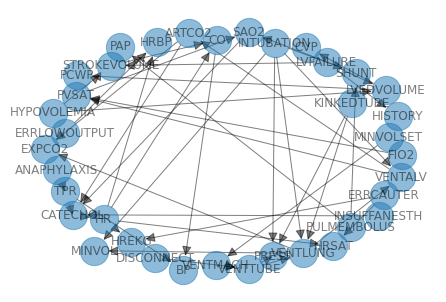

In [4]:
nx.draw(model, with_labels=True, arrowsize=20, node_size=800, alpha=0.5)
plt.show()

In [5]:
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_matrix(estimated_model.to_undirected(), nodelist=nodes, weight=None)
    true_adj = nx.to_numpy_matrix(true_model.to_undirected(), nodelist=nodes, weight=None)
    
    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)

In [6]:
est = PC(data=samples)
estimated_model = est.estimate(variant='stable', max_cond_vars=4)
get_f1_score(estimated_model, model)

Working for n conditional variables: 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.47s/it]D:\Study\RL\random-network-distillation-pytorch-master\PGM\pgmpy\estimators\PC.py:369: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.80s/it]

F1-score for the model skeleton:  0.8571428571428571


In [7]:
est = PC(data=samples)
scoring_method = BicScore(data=samples)
estimated_model = est.estimate(variant='orig', max_cond_vars=4,scoring_method=scoring_method)
get_f1_score(estimated_model, model)

Working for n conditional variables: 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.47s/it]D:\Study\RL\random-network-distillation-pytorch-master\PGM\pgmpy\estimators\PC.py:369: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.79s/it]

F1-score for the model skeleton:  0.8571428571428571


In [8]:
scoring_method = BicScore(data=samples)
est = HillClimbSearch(data=samples)
estimated_model = est.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4))
get_f1_score(estimated_model, model)

  0%|█                                                                                                                                                                                                                               | 45/10000 [00:15<57:05,  2.91it/s]

F1-score for the model skeleton:  0.8131868131868132


In [9]:
estimated_model.local_independencies('SHUNT')

(SHUNT ⟂ HR, HRSAT, CATECHOL, HISTORY, DISCONNECT, PCWP, INSUFFANESTH, FIO2, MINVOL, STROKEVOLUME, HYPOVOLEMIA, PVSAT, KINKEDTUBE, ARTCO2, PRESS, BP, TPR, EXPCO2, ERRCAUTER, HRBP, CVP, HREKG, LVFAILURE, ANAPHYLAXIS, CO, VENTTUBE, MINVOLSET, VENTLUNG, VENTALV, VENTMACH, LVEDVOLUME, ERRLOWOUTPUT | INTUBATION)

In [10]:
estimated_model.nodes()

NodeView(('MINVOLSET', 'VENTMACH', 'DISCONNECT', 'VENTTUBE', 'INTUBATION', 'PULMEMBOLUS', 'SHUNT', 'PAP', 'FIO2', 'KINKEDTUBE', 'VENTLUNG', 'VENTALV', 'ARTCO2', 'EXPCO2', 'PVSAT', 'SAO2', 'MINVOL', 'PRESS', 'ANAPHYLAXIS', 'TPR', 'INSUFFANESTH', 'CATECHOL', 'HR', 'ERRCAUTER', 'HRSAT', 'HREKG', 'ERRLOWOUTPUT', 'HRBP', 'LVFAILURE', 'HISTORY', 'HYPOVOLEMIA', 'STROKEVOLUME', 'CO', 'BP', 'LVEDVOLUME', 'PCWP', 'CVP'))

In [11]:
estimated_model.get_markov_blanket('VENTTUBE')

['INTUBATION', 'VENTMACH', 'ARTCO2', 'PRESS', 'DISCONNECT']

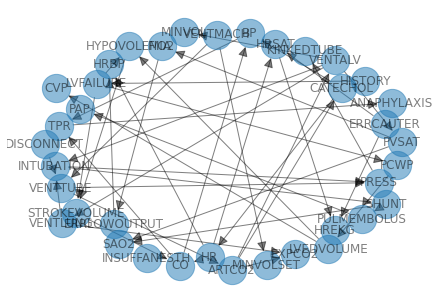

In [12]:
nx.draw(estimated_model, with_labels=True, arrowsize=20, node_size=800, alpha=0.5)
plt.show()

In [13]:
from pgmpy.models import BayesianModel

model_struct = BayesianModel(ebunch=estimated_model.edges())
model_struct.nodes()

NodeView(('VENTMACH', 'VENTTUBE', 'MINVOLSET', 'DISCONNECT', 'ARTCO2', 'PRESS', 'INTUBATION', 'SHUNT', 'PULMEMBOLUS', 'PAP', 'SAO2', 'FIO2', 'ERRLOWOUTPUT', 'VENTLUNG', 'EXPCO2', 'VENTALV', 'MINVOL', 'PVSAT', 'CATECHOL', 'KINKEDTUBE', 'TPR', 'ANAPHYLAXIS', 'HR', 'BP', 'HRBP', 'HRSAT', 'CO', 'ERRCAUTER', 'HREKG', 'LVFAILURE', 'PCWP', 'STROKEVOLUME', 'HYPOVOLEMIA', 'HISTORY', 'LVEDVOLUME', 'CVP'))

In [14]:
from pgmpy.estimators import MaximumLikelihoodEstimator

mle = MaximumLikelihoodEstimator(model=model_struct, data=samples)

# Estimating the CPD for a single node.
print(mle.estimate_cpd(node='FIO2'))
print(mle.estimate_cpd(node='CVP'))

# Estimating CPDs for all the nodes in the model
mle.get_parameters()[:10] # Show just the first 10 CPDs in the output

+--------------+-------------+---------------------+---------------+
| PVSAT        | PVSAT(HIGH) | PVSAT(LOW)          | PVSAT(NORMAL) |
+--------------+-------------+---------------------+---------------+
| FIO2(LOW)    | 0.0         | 0.05365853658536585 | 0.4375        |
+--------------+-------------+---------------------+---------------+
| FIO2(NORMAL) | 1.0         | 0.9463414634146341  | 0.5625        |
+--------------+-------------+---------------------+---------------+
+-------------+---------------------+----------------------+----------------------+
| LVEDVOLUME  | LVEDVOLUME(HIGH)    | LVEDVOLUME(LOW)      | LVEDVOLUME(NORMAL)   |
+-------------+---------------------+----------------------+----------------------+
| CVP(HIGH)   | 0.7318181818181818  | 0.023529411764705882 | 0.014388489208633094 |
+-------------+---------------------+----------------------+----------------------+
| CVP(LOW)    | 0.00909090909090909 | 0.9529411764705882   | 0.041726618705035974 |
+------------

[<TabularCPD representing P(ANAPHYLAXIS:2 | TPR:3) at 0x2080ed21820>,
 <TabularCPD representing P(ARTCO2:3 | VENTTUBE:4) at 0x2080e18b550>,
 <TabularCPD representing P(BP:3 | CATECHOL:2, CO:3) at 0x2080e18bf40>,
 <TabularCPD representing P(CATECHOL:2 | ARTCO2:3) at 0x2080e199130>,
 <TabularCPD representing P(CO:3 | HR:3, STROKEVOLUME:3) at 0x2080ed38ee0>,
 <TabularCPD representing P(CVP:3 | LVEDVOLUME:3) at 0x2080e199100>,
 <TabularCPD representing P(DISCONNECT:2) at 0x2080e199220>,
 <TabularCPD representing P(ERRCAUTER:2) at 0x2080e199190>,
 <TabularCPD representing P(ERRLOWOUTPUT:2 | FIO2:2) at 0x2080e1995e0>,
 <TabularCPD representing P(EXPCO2:4 | ARTCO2:3, VENTLUNG:4) at 0x2080e1993d0>]

In [15]:
from pgmpy.estimators import BayesianEstimator

best = BayesianEstimator(model=model_struct, data=samples)

print(best.estimate_cpd(node='FIO2', prior_type="BDeu", equivalent_sample_size=1000))
# Uniform pseudo count for each state. Can also accept an array of the size of CPD.
print(best.estimate_cpd(node='CVP', prior_type="dirichlet", pseudo_counts=100))

# Learning CPDs for all the nodes in the model. For learning all parameters with BDeU prior, a dict of
# pseudo_counts need to be provided
best.get_parameters(prior_type="BDeu", equivalent_sample_size=1000)[:10]

+--------------+---------------------+---------------------+---------------------+
| PVSAT        | PVSAT(HIGH)         | PVSAT(LOW)          | PVSAT(NORMAL)       |
+--------------+---------------------+---------------------+---------------------+
| FIO2(LOW)    | 0.33512064343163545 | 0.18265895953757225 | 0.49713740458015265 |
+--------------+---------------------+---------------------+---------------------+
| FIO2(NORMAL) | 0.6648793565683646  | 0.8173410404624277  | 0.5028625954198473  |
+--------------+---------------------+---------------------+---------------------+
+-------------+---------------------+--------------------+---------------------+
| LVEDVOLUME  | LVEDVOLUME(HIGH)    | LVEDVOLUME(LOW)    | LVEDVOLUME(NORMAL)  |
+-------------+---------------------+--------------------+---------------------+
| CVP(HIGH)   | 0.5019230769230769  | 0.2649350649350649 | 0.11055276381909548 |
+-------------+---------------------+--------------------+---------------------+
| CVP(LOW)    

[<TabularCPD representing P(VENTMACH:4) at 0x2080e1bf0a0>,
 <TabularCPD representing P(VENTTUBE:4 | DISCONNECT:2, VENTMACH:4) at 0x2080ed66070>,
 <TabularCPD representing P(MINVOLSET:3 | VENTMACH:4) at 0x2080e1bf070>,
 <TabularCPD representing P(DISCONNECT:2) at 0x2080e1bf100>,
 <TabularCPD representing P(ARTCO2:3 | VENTTUBE:4) at 0x2080e1bf220>,
 <TabularCPD representing P(PRESS:4 | INTUBATION:3, VENTTUBE:4) at 0x2080e1bfb20>,
 <TabularCPD representing P(INTUBATION:3 | VENTALV:4, VENTLUNG:4) at 0x2080e1b8520>,
 <TabularCPD representing P(SHUNT:2 | INTUBATION:3) at 0x2080e1c71f0>,
 <TabularCPD representing P(PULMEMBOLUS:2 | SHUNT:2) at 0x2080e1c7250>,
 <TabularCPD representing P(PAP:3 | PULMEMBOLUS:2) at 0x2080e1c7490>]

In [16]:
model_struct = BayesianModel(ebunch=model.edges())
model_struct.fit(data=samples, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=1000)
print(model_struct.get_cpds('VENTTUBE'))

+------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| DISCONNECT       | DISCONNECT(FALSE)   | DISCONNECT(FALSE)   | DISCONNECT(FALSE)   | DISCONNECT(FALSE)   | DISCONNECT(TRUE)    | DISCONNECT(TRUE)    | DISCONNECT(TRUE)    | DISCONNECT(TRUE)    |
+------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| VENTMACH         | VENTMACH(HIGH)      | VENTMACH(LOW)       | VENTMACH(NORMAL)    | VENTMACH(ZERO)      | VENTMACH(HIGH)      | VENTMACH(LOW)       | VENTMACH(NORMAL)    | VENTMACH(ZERO)      |
+------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| VENTTUBE(HIGH

In [17]:
model_bayes = BayesianModel(estimated_model.edges)
from pgmpy.inference import VariableElimination
model_infer = VariableElimination(model_bayes)

ValueError: No CPD associated with VENTMACH

In [ ]:
samples_infer = BayesianModelSampling(model_bayes).forward_sample(size=int(1e3))
samples_infer.head()

In [ ]:
model_bayes.get_cpds()

In [ ]:
from pgmpy.inference import VariableElimination
model_infer = VariableElimination(estimated_model)

In [ ]:
q = model.query(variables=['SHUNT'], evidence={'VENTMACH': 'NORMAL'})
print(q)

# Computing the joint probability of bronc and asia given smoke=yes
q = model.query(variables=['SHUNT', 'FIO2'], evidence={'VENTMACH': 'NORMAL'})
print(q)

# Computing the probabilities (not joint) of bronc and asia given smoke=no
q = model.query(variables=['SHUNT', 'INSUFFANESTH'], evidence={'VENTMACH': 'NORMAL'}, joint=False)
for factor in q.values():
    print(factor)

In [ ]:
from pgmpy.factors.continuous import LinearGaussianCPD
import numpy as np

mu = np.array([2,3,8,10])
sigma = np.array([[2.3, 0, 0, 0],
                  [0, 1.5, 0, 0],
                  [0, 0, 1.7, 0],
                  [0, 0,   0, 2]
                 ])

cpd = LinearGaussianCPD('Y',  mu, sigma, ['U1', 'U2', 'U3'])
cpd.variable
cpd.evidence
cpd.beta_vector

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
n_bins = 5
score = np.random.uniform(0,10,10)
y = label_encoder.fit_transform(pd.cut(score, n_bins, retbins=True)[0])
rfc = RandomForestClassifier(n_estimators=100, verbose=0)
rfc.fit(score.reshape(-1, 1), y)


RandomForestClassifier()

In [61]:
score

array([8.21223513, 2.7647325 , 2.00937254, 9.66407704, 9.36999666,
       1.39881415, 1.34814178, 8.24008133, 7.33521577, 1.62703954])

In [62]:
y

array([2, 0, 0, 2, 2, 0, 0, 2, 1, 0])

In [ ]:
discretizer.cardinality


In [ ]:
discretizer.get_labels()

In [43]:
import numpy as np
from pgmpy.factors.continuous import ContinuousFactor
from pgmpy.factors.continuous import RoundingDiscretizer
from scipy.stats import multivariate_normal
std_normal_pdf = lambda x: 2 * multivariate_normal.pdf(x, [0, 0], [[1, 0], [0, 1]])
std_normal = ContinuousFactor(['x1', 'x2'], std_normal_pdf)
discretizer = RoundingDiscretizer(1,2,3)
discretizer.factor

TypeError: type.__new__() argument 1 must be str, not int